# Initialize my Notebook

In [1]:
using LinearAlgebra
using Random
using Plots
gr()
using Latexify
set_default(fmt = "%.4f", convert_unicode = false)
#latexify(IntermediateValues) |> print

# Complex numbers in Julia

In [2]:
z= 2 + 3im

2 + 3im

In [3]:
@show x=real(z)
@show y=imag(z)
@show conj(z)

x = real(z) = 2
y = imag(z) = 3
conj(z) = 2 - 3im


2 - 3im

In [4]:
@show (x - y*im)*z
@show abs(z)^2
@show conj(z)
@show abs(2 * 3*im)
@show z*conj(z) - abs(z)^2

(x - y * im) * z = 13 + 0im
abs(z) ^ 2 = 12.999999999999998
conj(z) = 2 - 3im
abs(2 * 3 * im) = 6.0
z * conj(z) - abs(z) ^ 2 = 1.7763568394002505e-15 + 0.0im


1.7763568394002505e-15 + 0.0im

# z1/z2 ? 

In [5]:
z1=11+4*im
z2=pi-14*im
z1/z2

-0.10415564197974829 + 0.8090867571195361im

# z[k] = a^k z0 

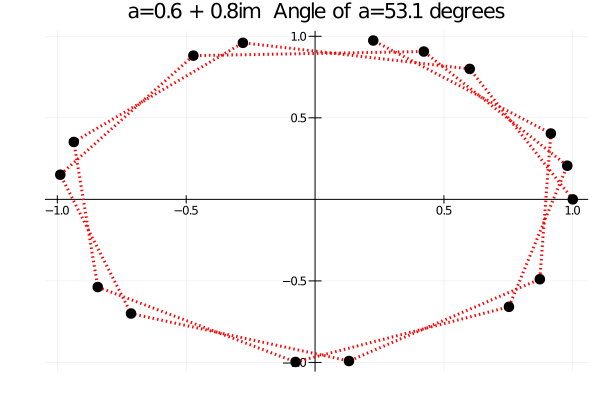

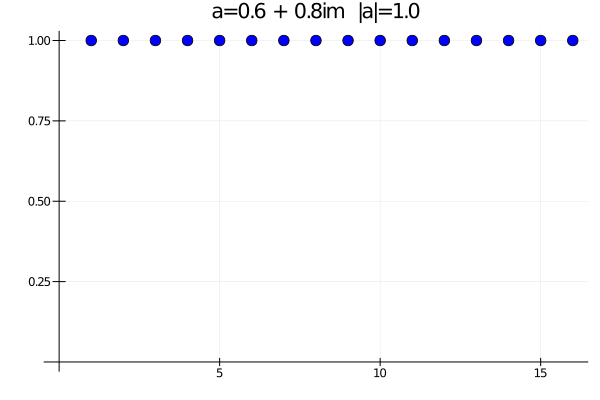

Angle of a in degrees is 53.1


100.0

In [6]:
a=(3 + 4*im)/5; theta=round(10*angle(a)*180/pi)/10; #a=a/abs(a); 
#theta=pi/3; a = cos(theta) + sin(theta)*im
println("Angle of a in degrees is $theta") 
N=15
zVec=Vector{Complex{Float64}}(undef,N+1)
#
#
z0=1.0+0*im
zVec[1]=z0
for k=1:N
    zVec[k+1]=a*zVec[k]
 end

#scatter(1:(N+1), abs.(zVec))

mag_a = round(100*abs(a))/100.
p1=plot(real(zVec), imag(zVec), legend = false, line = (:dot, 3), color=:red, title="a=$a  Angle of a=$theta degrees")
p1=scatter!(real(zVec), imag(zVec), legend = false, framestyle = :origin, markersize = 6, color=:black)
png(p1, "Spiral01")
display(p1)
#
p2=scatter(1:N+1, abs.(zVec), legend = false, framestyle = :origin, markersize = 6, color=:blue, title="a=$a  |a|=$mag_a")
png(p2, "Spiral02")
display(p2)

round(100*mag_a)

# Playing with the angle

In [7]:
z=-2 - 3*im
x=real(z)
y=imag(z)
@show angle(z)
theta=pi-atan(y/abs(x))

angle(z) = -2.1587989303424644


4.124386376837122

# Eigenvalues and Eigenvectors

In [8]:
? eigen


search: eigen eigen! Eigen GeneralizedEigen weighted_color_mean eigvecs



```
eigen(A; permute::Bool=true, scale::Bool=true, sortby) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

For general nonsymmetric matrices it is possible to specify how the matrix is balanced before the eigenvector calculation. The option `permute=true` permutes the matrix to become closer to upper triangular, and `scale=true` scales the matrix by its diagonal elements to make rows and columns more equal in norm. The default is `true` for both options.

By default, the eigenvalues and vectors are sorted lexicographically by `(real(λ),imag(λ))`. A different comparison function `by(λ)` can be passed to `sortby`, or you can pass `sortby=nothing` to leave the eigenvalues in an arbitrary order.   Some special matrix types (e.g. [`Diagonal`](@ref) or [`SymTridiagonal`](@ref)) may implement their own sorting convention and not accept a `sortby` keyword.

# Examples

```jldoctest
julia> F = eigen([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
  1.0
  3.0
 18.0
vectors:
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> F.values
3-element Array{Float64,1}:
  1.0
  3.0
 18.0

julia> F.vectors
3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A, B) -> GeneralizedEigen
```

Computes the generalized eigenvalue decomposition of `A` and `B`, returning a [`GeneralizedEigen`](@ref) factorization object `F` which contains the generalized eigenvalues in `F.values` and the generalized eigenvectors in the columns of the matrix `F.vectors`. (The `k`th generalized eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

Any keyword arguments passed to `eigen` are passed through to the lower-level [`eigen!`](@ref) function.

# Examples

```jldoctest
julia> A = [1 0; 0 -1]
2×2 Array{Int64,2}:
 1   0
 0  -1

julia> B = [0 1; 1 0]
2×2 Array{Int64,2}:
 0  1
 1  0

julia> F = eigen(A, B);

julia> F.values
2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

julia> F.vectors
2×2 Array{Complex{Float64},2}:
  0.0+1.0im   0.0-1.0im
 -1.0+0.0im  -1.0-0.0im

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, irange::UnitRange) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

The [`UnitRange`](@ref) `irange` specifies indices of the sorted eigenvalues to search for.

!!! note
    If `irange` is not `1:n`, where `n` is the dimension of `A`, then the returned factorization will be a *truncated* factorization.


---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, vl::Real, vu::Real) -> Eigen
```

Computes the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

`vl` is the lower bound of the window of eigenvalues to search for, and `vu` is the upper bound.

!!! note
    If [`vl`, `vu`] does not contain all eigenvalues of `A`, then the returned factorization will be a *truncated* factorization.



In [9]:
A=[0 -1; 1 0]
F= eigen(A)
lambda=F.values

2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

In [10]:
@show real(lambda[1])
@show imag(lambda[1])

real(lambda[1]) = 0.0
imag(lambda[1]) = -1.0


-1.0

In [11]:
# (The kth eigenvector can be obtained from the slice F.vectors[:, k].)
vectors=F.vectors

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

In [12]:
@show real(vectors[:,1])
@show imag(vectors[:,1])

real(vectors[:, 1]) = [0.7071067811865475, 0.0]
imag(vectors[:, 1]) = [-0.0, 0.7071067811865475]


2-element Array{Float64,1}:
 -0.0
  0.7071067811865475

# Segway

## Illustrate 
a) ||xk|| contracting or blowing up depending on the initial condition

b) xk evolving along the span of an e-vector

In [13]:
function SegwayModel()
    #= Original model coorindates are phi=x(1);theta=x(2); dphi=x(3);dtheta=x(4); 
    phi = angle of Segway body, #theta = wheel rotation angle, hence lateral position
    = r (theta + phi),  where r = wheel radius; In the end, we are using center of mass (CoM)
    also called, center of gravity
    =#
    r=0.5
    # P=[1 0 0 0; r r 0 0; 0 0 1 0; 0 0 r r] #coordinate change for x position
    #
    P=[1 0 0 0; 1.2 0.5 0 0; 0 0 1 0; 0 0 1.2 0.5]  # coordinate change for x-CoM
    Ac = [0 0 1 0; 0 0 0 1; 2.568 0 0 0; -5.020  0 0 0];
    Bc = [0;0;-0.7172;1.6744]
    Id = zeros(4,4) + I
    dt = 0.1
    A = Id + dt*Ac
    B = dt*Bc
    A=P*A*inv(P); B=P*B # puts the coordinates as lean angle (radians) and horizonal position (m)
    return A, B
end
(A,B)=SegwayModel()

([1.0 0.0 0.1 0.0; 0.0 1.0 -6.661338147750939e-18 0.1; 0.25680000000000003 0.0 1.0 0.0; 0.057160000000000044 0.0 0.0 1.0], [0.0, 0.0, -0.07171999999999999, -0.002343999999999971])

In [14]:
F=eigen(A)
@show evalues=F.values
evectors=F.vectors
println("evalues are not distinct and thus the e-vectors are not guaranteed to be linearly independent")

evalues = F.values = [0.8397501950079189, 1.0, 1.0, 1.160249804992081]
evalues are not distinct and thus the e-vectors are not guaranteed to be linearly independent


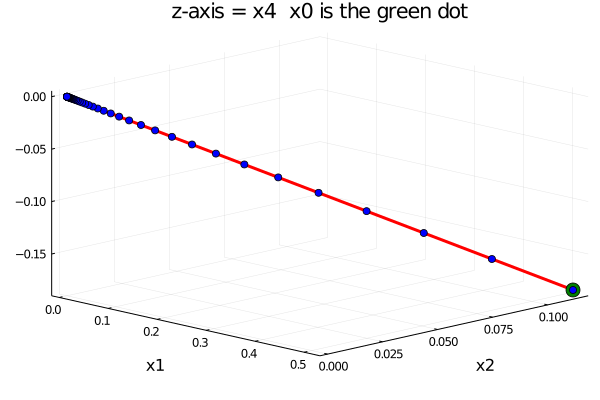

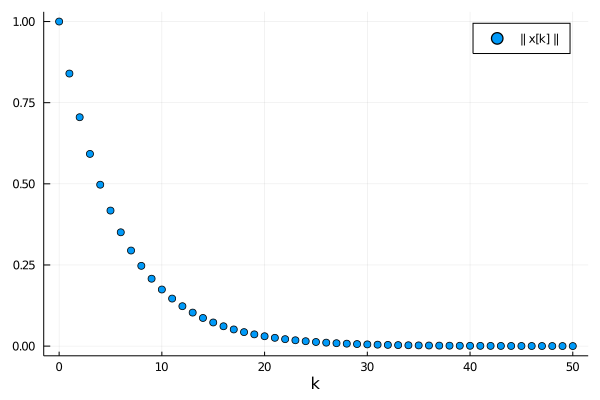

In [15]:
N=50
x0=evectors[:,1]
xTraj=Array{Float64,2}(undef,4,0)
normxTraj=Vector{Float64}(undef,0)
xTraj=[xTraj x0]
normxTraj=[normxTraj; norm(x0)]
C=[1 0 0 0; 0 1 0 0; 0 0 0 1]
y=[0*C*x0 C*x0]
p1=plot(y[1,:],y[2,:],y[3,:], lw=3, legend=false, color=:red, camera = (45, 45))
# big green ball at the initial condition
plot!([x0[1]],[x0[2]],[x0[4]], seriestype=:scatter, markersize = 8, legend=false, color=:green, camera = (45, 45))
xlabel!("x1")
ylabel!("x2")
for k = 1:N
    xkp1=A*xTraj[:,k]
    xTraj=[xTraj xkp1]
    normxTraj=[normxTraj; norm(xkp1)]
end
plot!(xTraj[1,:],xTraj[2,:],xTraj[4,:],seriestype=:scatter, markersize = 4, legend=false, color=:blue, 
     title="z-axis = x4  x0 is the green dot", camera = (45, 45))
display(p1)
p2=scatter(0:N, normxTraj,label="|| x[k] ||")
xlabel!("k")
#ylabel!("||x[k]||")

# Make up a 3 x 3 system

a) Show that for a random x0, the trajectory blows up

b) Show that for an initial condition in the real span {v1 v2}, solutions decay and they appear to stay in a plane

c) Build a plane from the real and imaginary parts of evectors

d) Start in the plane, show that we stay in the plane


In [16]:
Random.seed!(12345678);
M=rand(3,3)
phi=pi/32
Lambda=zeros(3,3)
Lambda[1,1]=1.1
Lambda[2:3,2:3]=0.985*[cos(phi) -sin(phi); sin(phi) cos(phi)]
A = M*Lambda*inv(M)
F=eigen(A)
evalues=F.values

3-element Array{Complex{Float64},1}:
 0.9802569557721129 - 0.0965468832246171im
 0.9802569557721129 + 0.0965468832246171im
 1.0999999999999992 + 0.0im

In [24]:
A[1,1]

1.1434638076945582

In [18]:
abs.(evalues)

3-element Array{Float64,1}:
 0.984999999999999
 0.984999999999999
 1.0999999999999992

In [19]:
evectors=F.vectors

3×3 Array{Complex{Float64},2}:
 0.179965-0.157463im  0.179965+0.157463im  -0.697642+0.0im
 0.410966+0.427187im  0.410966-0.427187im  -0.436728+0.0im
 0.769049-0.0im       0.769049+0.0im       -0.567947+0.0im

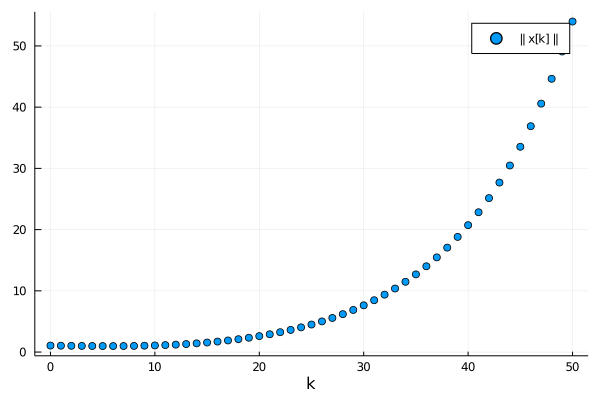

In [20]:
x0=rand(3,1)
N=50
xTraj=Array{Float64,2}(undef,3,0)
normxTraj=Vector{Float64}(undef,0)
xTraj=[xTraj x0]
normxTraj=[normxTraj; norm(x0)]
# p1=plot(xTraj[1,:],xTraj[2,:],xTraj[3,:], lw=3, legend=false, color=:red, camera = (45, 45))
# # big green ball at the initial condition
# plot!([x0[1]],[x0[2]],[x0[3]], seriestype=:scatter, markersize = 8, legend=false, color=:green, camera = (45, 45))
# xlabel!("x1")
# ylabel!("x2")
for k = 1:N
    xkp1=A*xTraj[:,k]
    xTraj=[xTraj xkp1]
    normxTraj=[normxTraj; norm(xkp1)]
end
# plot!(xTraj[1,:],xTraj[2,:],xTraj[3,:],seriestype=:scatter, markersize = 4, legend=false, color=:blue, 
#      title="z-axis = x3  x0 is the green dot", camera = (45, 45))
#display(p1)
p2=scatter(0:N, normxTraj,label="|| x[k] ||")
xlabel!("k")


# Illustration of trajectory staying in the plane defined by the real and imaginary parts of an eigenvector.

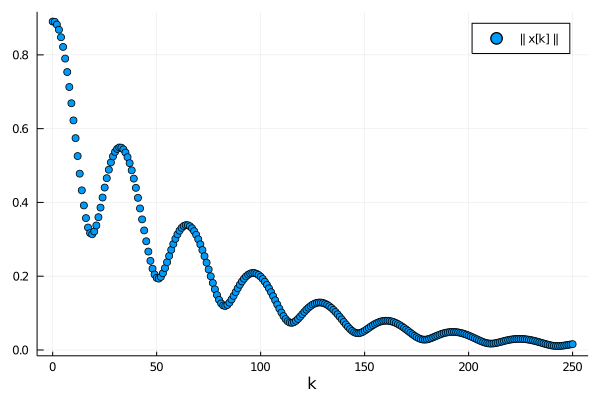

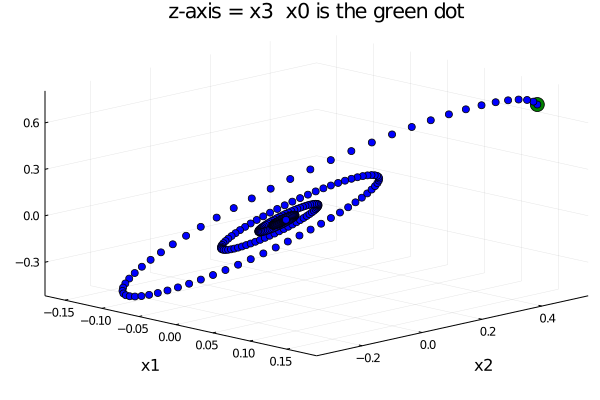

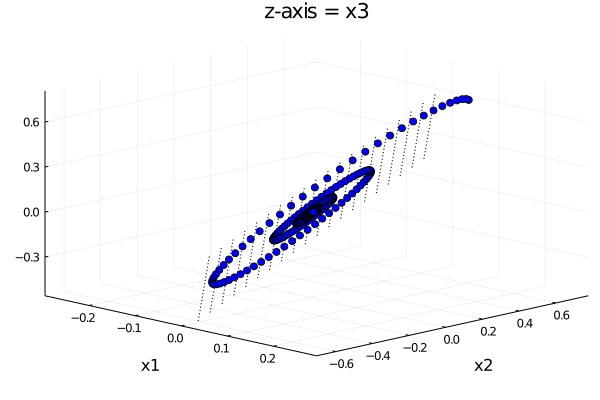

In [41]:
v1=evectors[:,1]
x0=real(v1)
N=250
xTraj=Array{Float64,2}(undef,3,0)
normxTraj=Vector{Float64}(undef,0)
xTraj=[xTraj x0]
normxTraj=[normxTraj; norm(x0)]
p1=plot(xTraj[1,:],xTraj[2,:],xTraj[3,:], lw=3, legend=false, color=:red, camera = (45, 45))
# big green ball at the initial condition
plot!([x0[1]],[x0[2]],[x0[3]], seriestype=:scatter, markersize = 8, legend=false, color=:green, camera = (45, 45))
xlabel!("x1")
ylabel!("x2")
for k = 1:N
    xkp1=A*xTraj[:,k]
    xTraj=[xTraj xkp1]
    normxTraj=[normxTraj; norm(xkp1)]
end
plot!(xTraj[1,:],xTraj[2,:],xTraj[3,:],seriestype=:scatter, markersize = 4, legend=false, color=:blue, 
     title="z-axis = x3  x0 is the green dot", camera = (45, 45))
p2=scatter(0:N, normxTraj,label="|| x[k] ||")
xlabel!("k") 
xPlane=Array{Float64,2}(undef,3,0)
m=10; mm=2*m; d1=1.5; d2=2
for j = 1:mm
    c1=(j-m)*d1/mm
    for k=1:mm
        c2=(k-m)*d2/mm
      xPlane=[xPlane  c1*real(v1) + c2*imag(v1)]  
    end
end
p3=plot(xTraj[1,:],xTraj[2,:],xTraj[3,:],seriestype=:scatter, markersize = 4, legend=false, color=:blue, 
   title="z-axis = x3  x0 is the green dot", camera = (45, 45))
plot!(xPlane[1,:],xPlane[2,:],xPlane[3,:],seriestype=:scatter, markersize = .5, legend=false, color=:grey, 
     title="z-axis = x3", camera = (45, 45))
xlabel!("x1")
ylabel!("x2")
display(p2)
display(p1)
display(p3)

┌ Info: Saved animation to 
│   fn = /home/jovyan/tmp.gif
└ @ Plots /opt/julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/tmp.gif")
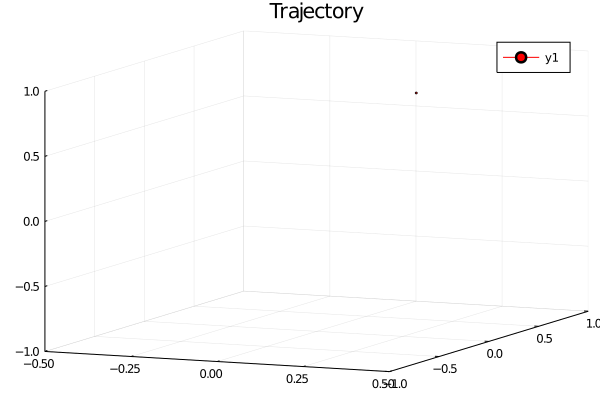

In [38]:
#    
Base.@kwdef mutable struct LinearSystemJWG
    A::Array{Float64,2} = [1.1434638077e+00  1.9485816585e-02 -6.8372833662e-02 ;
    5.5732054767e-02  9.0791916620e-01  7.9243539858e-02 ;
    1.4851300179e-01  -1.1906714109e-01  1.0091309376e+00 ]
    v::Vector{Float64} = [0.17996452207571603; 0.4109662391904019; 0.7690488928840977]
end
    
function step!(l::LinearSystemJWG)
    l.v=(l.A)*(l.v)
end
    
trajectory = LinearSystemJWG()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-.5, .5),
    ylim = (-1, 1),
    zlim = (-1, 1),
    title = "Trajectory",
    marker = 2,
    lw=4,
    c=:red,
)

# build an animated gif by pushing new points to the plot, saving every 2nd frame
@gif for i=1:200
    step!(trajectory)
    push!(plt, trajectory.v[1], trajectory.v[2], trajectory.v[3])
end every 2        

#  Lorenz Attractor

In [ ]:
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10
